In [3]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import pickle

In [4]:
smoking_ex1 = pickle.load(open('../best_models/best_smoking_ex1.pkl', 'rb'))
smoking_ex2 = pickle.load(open('../best_models/best_smoking_ex2.pkl', 'rb'))

drinking_ex1 = pickle.load(open('../best_models/best_drinking_ex1.pkl', 'rb'))
drinking_ex2 = pickle.load(open('../best_models/best_drinking_ex2.pkl', 'rb'))

drugs_ex1 = pickle.load(open('../best_models/best_drugs_ex1.pkl', 'rb'))
drugs_ex2 = pickle.load(open('../best_models/best_drugs_ex2.pkl', 'rb'))

In [11]:
stemmer = SnowballStemmer("dutch")
np.random.seed(500)

def create_preprocess_corpus(input_csv, content_name, label_name, skip_rows=[]):
    corpus = pd.read_csv(input_csv,encoding='latin-1', skiprows=skip_rows)
    corpus = corpus.rename({content_name:'text', label_name: 'label'}, axis=1)
    corpus['text'] = corpus['text'].str.replace('\t',' ')
    corpus.drop(['Unnamed: 0'], axis=1, inplace=True)
    corpus.drop_duplicates(inplace=True)
    corpus['text'] = corpus['text'].astype(str)
    corpus['text'] = corpus['text'].str.lower()
    #corpus['text'].replace(to_replace="[^\w\s]", value="", regex=True, inplace=True)
    corpus['text'] = [stemmer.stem(text) for text in corpus['text']]
    corpus = corpus.drop(corpus[corpus.label == '--'].index)
    corpus_backup = corpus.copy()
    return corpus, corpus_backup

In [7]:
full_smoking_corpus, full_smoking_corpus_backup = create_preprocess_corpus("../../input_data/smoking/labelled_smoking.csv", "roken_report_content", "roken_answer_label")

In [12]:
full_drinking_corpus, full_drinking_corpus_backup = create_preprocess_corpus("../../input_data/drinking/labelled_drinking.csv", "alcohol_report_content", "alcohol_answer_label", skip_rows=[227225])

In [13]:
full_drugs_corpus, full_drugs_corpus_backup = create_preprocess_corpus("../../input_data/drugs/labelled_drugs.csv", "drugs_report_content", "drugs_answer_label")

In [14]:
_, smoking_x_test, _, smoking_y_test = train_test_split(full_smoking_corpus['text'], full_smoking_corpus['label'], test_size=0.2, random_state=50)

In [15]:
_, drinking_x_test, _, drinking_y_test = train_test_split(full_drinking_corpus['text'], full_drinking_corpus['label'], test_size=0.2, random_state=50)

In [17]:
_, drugs_x_test, _, drugs_y_test = train_test_split(full_drugs_corpus['text'], full_drugs_corpus['label'], test_size=0.2, random_state=50)

0.9005847953216374


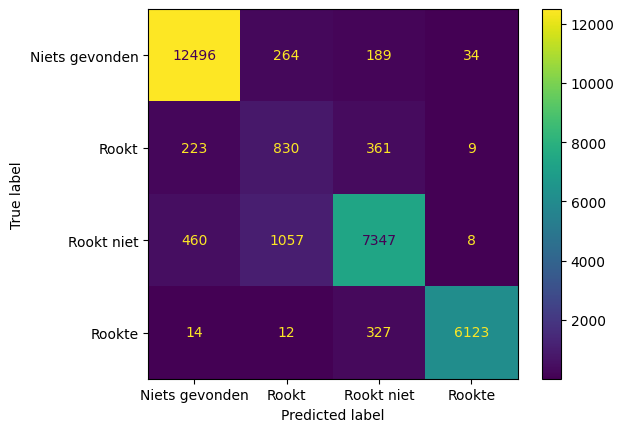

                precision    recall  f1-score   support

Niets gevonden       0.95      0.96      0.95     12983
         Rookt       0.38      0.58      0.46      1423
    Rookt niet       0.89      0.83      0.86      8872
        Rookte       0.99      0.95      0.97      6476

      accuracy                           0.90     29754
     macro avg       0.80      0.83      0.81     29754
  weighted avg       0.91      0.90      0.91     29754



In [20]:
predicted_nb = smoking_ex1.predict(smoking_x_test)
print(np.mean(predicted_nb == smoking_y_test))
cm = confusion_matrix(smoking_y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=smoking_ex1.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(smoking_y_test, predicted_nb,
    target_names=smoking_ex1.classes_))

In [29]:
ex1_features = smoking_ex1['tfidf'].get_feature_names_out()
ex1_coef = smoking_ex1['clf'].best_estimator_.coef_

In [30]:
ex1_features

array(['00 1012l', '00 109l', '00 aan', ...,
       'î²2glycoproteine antistoffen', 'î³gt alat', 'î¼moll normale'],
      dtype=object)

In [41]:
feature_importance = pd.DataFrame(ex1_features, columns=['feature'])

In [42]:
feature_importance['nothing_found_importance'] = ex1_coef[0]
feature_importance['current_user_importance'] = ex1_coef[1]
feature_importance['non_user_importance'] = ex1_coef[2]
feature_importance['previous_user_importance'] = ex1_coef[3]

In [43]:
ex1_coef.shape

(4, 972877)

In [44]:
smoking_ex1['clf'].best_estimator_.classes_

array(['Niets gevonden', 'Rookt', 'Rookt niet', 'Rookte'], dtype='<U14')

In [45]:
feature_importance

,feature,nothing_found_importance,current_user_importance,non_user_importance,previous_user_importance
0,00 1012l,0.0,0.0,0.0,0.0
1,00 109l,0.0,0.0,0.0,0.0
2,00 aan,0.0,0.0,0.0,0.0
3,00 aanvullend,0.0,0.0,0.0,0.0
4,00 achillespees,0.0,0.0,0.0,0.0
...,...,...,...,...,...
972872,ããnmalig tobramycine,0.0,0.0,0.0,0.0
972873,ããnmalige screening,0.0,0.0,0.0,0.0
972874,î²2glycoproteine antistoffen,0.0,0.0,0.0,0.0
972875,î³gt alat,0.0,0.0,0.0,0.0


In [48]:
feature_importance.sort_values(by='non_user_importance', ascending=False)

,feature,nothing_found_importance,current_user_importance,non_user_importance,previous_user_importance
766523,rookt niet,-61.935300,-44.731953,71.952882,0.000000
763950,roken alcohol,-41.420324,-44.699115,70.205420,-11.843894
764471,roken nee,-26.022418,-24.837309,42.228718,0.000000
477325,intoxicaties roken,-51.011558,28.462362,27.396158,-7.232586
764130,roken drugs,-9.667273,-3.038798,21.037452,0.000000
...,...,...,...,...,...
165619,beleid beleid,13.581206,-14.878015,-16.837580,-15.199891
504113,klinishe gegevens,16.416041,-10.463287,-16.932915,-14.404185
167642,beloop beloop,19.001196,-17.077245,-21.494701,-21.430495
571700,met collegiale,0.000000,0.000000,-23.710550,-22.923237
